## Vaccine Prediction Using Logistic Regression

### Importing dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\vaccine prediction.csv")

In [3]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


### Understanding Data

In [4]:
df.shape

(26707, 34)

In [5]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [6]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [7]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [8]:
df["census_msa"].value_counts()


MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [9]:
df["sex"].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [10]:
df["race"].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [11]:
df["age_bracket"].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

In [12]:
df["qualification"].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [13]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


### Data cleaning

In [14]:
df["qualification"].replace(["< 12 Years","12 Years","Some College","College Graduate"],[0,1,2,3],inplace=True)
df["census_msa"].replace(["MSA, Principle City","MSA, Not Principle  City","Non-MSA"],[1,2,3],inplace=True)
df["sex"].replace(["Male","Female"],[1,0],inplace=True)
df["race"].replace(["White","Black","Hispanic","Other or Multiple"],[1,2,3,4],inplace=True)
df["age_bracket"].replace(["18 - 34 Years","35 - 44 Years","45 - 54 Years","55 - 64 Years","65+ Years"],[1,2,3,4,5],inplace=True)

In [15]:
df=df.drop(columns=['unique_id','has_health_insur','income_level', 'marital_status', 'housing_status','employment', 'census_msa', 'no_of_adults', 'no_of_children'])

In [16]:
df.shape

(26707, 25)

In [17]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,2.0,2.0,1.0,2.0,4,0.0,1,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,4.0,4.0,2.0,4.0,2,1.0,1,1,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,1.0,1.0,4.0,1.0,2.0,1,3.0,1,1,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,5.0,5.0,4.0,1.0,5,1.0,1,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,2.0,3.0,1.0,4.0,3,2.0,1,0,0


In [18]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky',
       'sick_from_h1n1_vacc', 'is_seas_vacc_effective', 'is_seas_risky',
       'sick_from_seas_vacc', 'age_bracket', 'qualification', 'race', 'sex',
       'h1n1_vaccine'],
      dtype='object')

In [19]:
df_temp=df[['h1n1_worry', 'h1n1_awareness','dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc','is_health_worker','is_h1n1_vacc_effective', 'is_h1n1_risky','is_seas_vacc_effective', 'is_seas_risky','h1n1_vaccine']]
df_temp.head()

,h1n1_worry,h1n1_awareness,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,is_seas_vacc_effective,is_seas_risky,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0
1,3.0,2.0,0.0,0.0,0.0,5.0,4.0,4.0,2.0,0
2,1.0,1.0,NaN,NaN,0.0,3.0,1.0,4.0,1.0,0
3,1.0,1.0,0.0,1.0,0.0,3.0,3.0,5.0,4.0,0
4,2.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,0


In [20]:
df_temp.shape

(26707, 10)

In [21]:
df_temp.isna().sum()

h1n1_worry                  92
h1n1_awareness             116
dr_recc_h1n1_vacc         2160
dr_recc_seasonal_vacc     2160
is_health_worker           804
is_h1n1_vacc_effective     391
is_h1n1_risky              388
is_seas_vacc_effective     462
is_seas_risky              514
h1n1_vaccine                 0
dtype: int64

In [22]:
df_temp=df_temp.dropna()
df_temp.head()

,h1n1_worry,h1n1_awareness,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,is_seas_vacc_effective,is_seas_risky,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,1.0,0
1,3.0,2.0,0.0,0.0,0.0,5.0,4.0,4.0,2.0,0
3,1.0,1.0,0.0,1.0,0.0,3.0,3.0,5.0,4.0,0
4,2.0,1.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,0
5,3.0,1.0,0.0,1.0,0.0,5.0,2.0,5.0,4.0,0


In [23]:
df_temp.shape

(23642, 10)

## Vizualization

In [24]:
corr=df.corr()
corr

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,h1n1_vaccine
h1n1_worry,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,0.150206,...,0.377033,0.360070,0.235136,0.333990,0.225731,0.059614,-0.066514,0.092734,-0.127614,0.121929
h1n1_awareness,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,0.093829,...,0.073086,-0.019501,0.086103,0.076825,-0.062483,-0.044129,0.323569,-0.105209,-0.067335,0.117951
antiviral_medication,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,0.051235,...,0.105163,0.079091,0.015003,0.085315,0.084305,-0.094102,-0.066919,0.102571,-0.006185,0.040608
contact_avoidance,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,0.068145,...,0.117851,0.131405,0.119554,0.129504,0.082942,0.000898,0.018962,-0.005660,-0.113957,0.047690
bought_face_mask,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,0.084282,...,0.131165,0.107129,0.041556,0.110161,0.090009,0.005261,-0.056888,0.090074,-0.049986,0.070498
wash_hands_frequently,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,0.088729,...,0.168711,0.150024,0.138517,0.172464,0.088029,0.016889,-0.019444,0.039061,-0.157256,0.074712
avoid_large_gatherings,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,0.082242,...,0.126463,0.185924,0.078491,0.132865,0.135446,0.094688,-0.176252,0.099550,-0.056145,0.017822
reduced_outside_home_cont,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,0.070346,...,0.125549,0.174834,0.067469,0.120237,0.138133,0.090356,-0.201607,0.102357,-0.039423,0.021768
avoid_touch_face,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,0.088221,...,0.146080,0.131772,0.105798,0.143735,0.090097,0.051873,-0.055981,0.030056,-0.163325,0.071648
dr_recc_h1n1_vacc,0.150206,0.093829,0.051235,0.068145,0.084282,0.088729,0.082242,0.070346,0.088221,1.000000,...,0.262826,0.113111,0.107512,0.202320,0.057128,0.009171,0.026854,0.015597,-0.042448,0.393890


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt 

<Axes: >

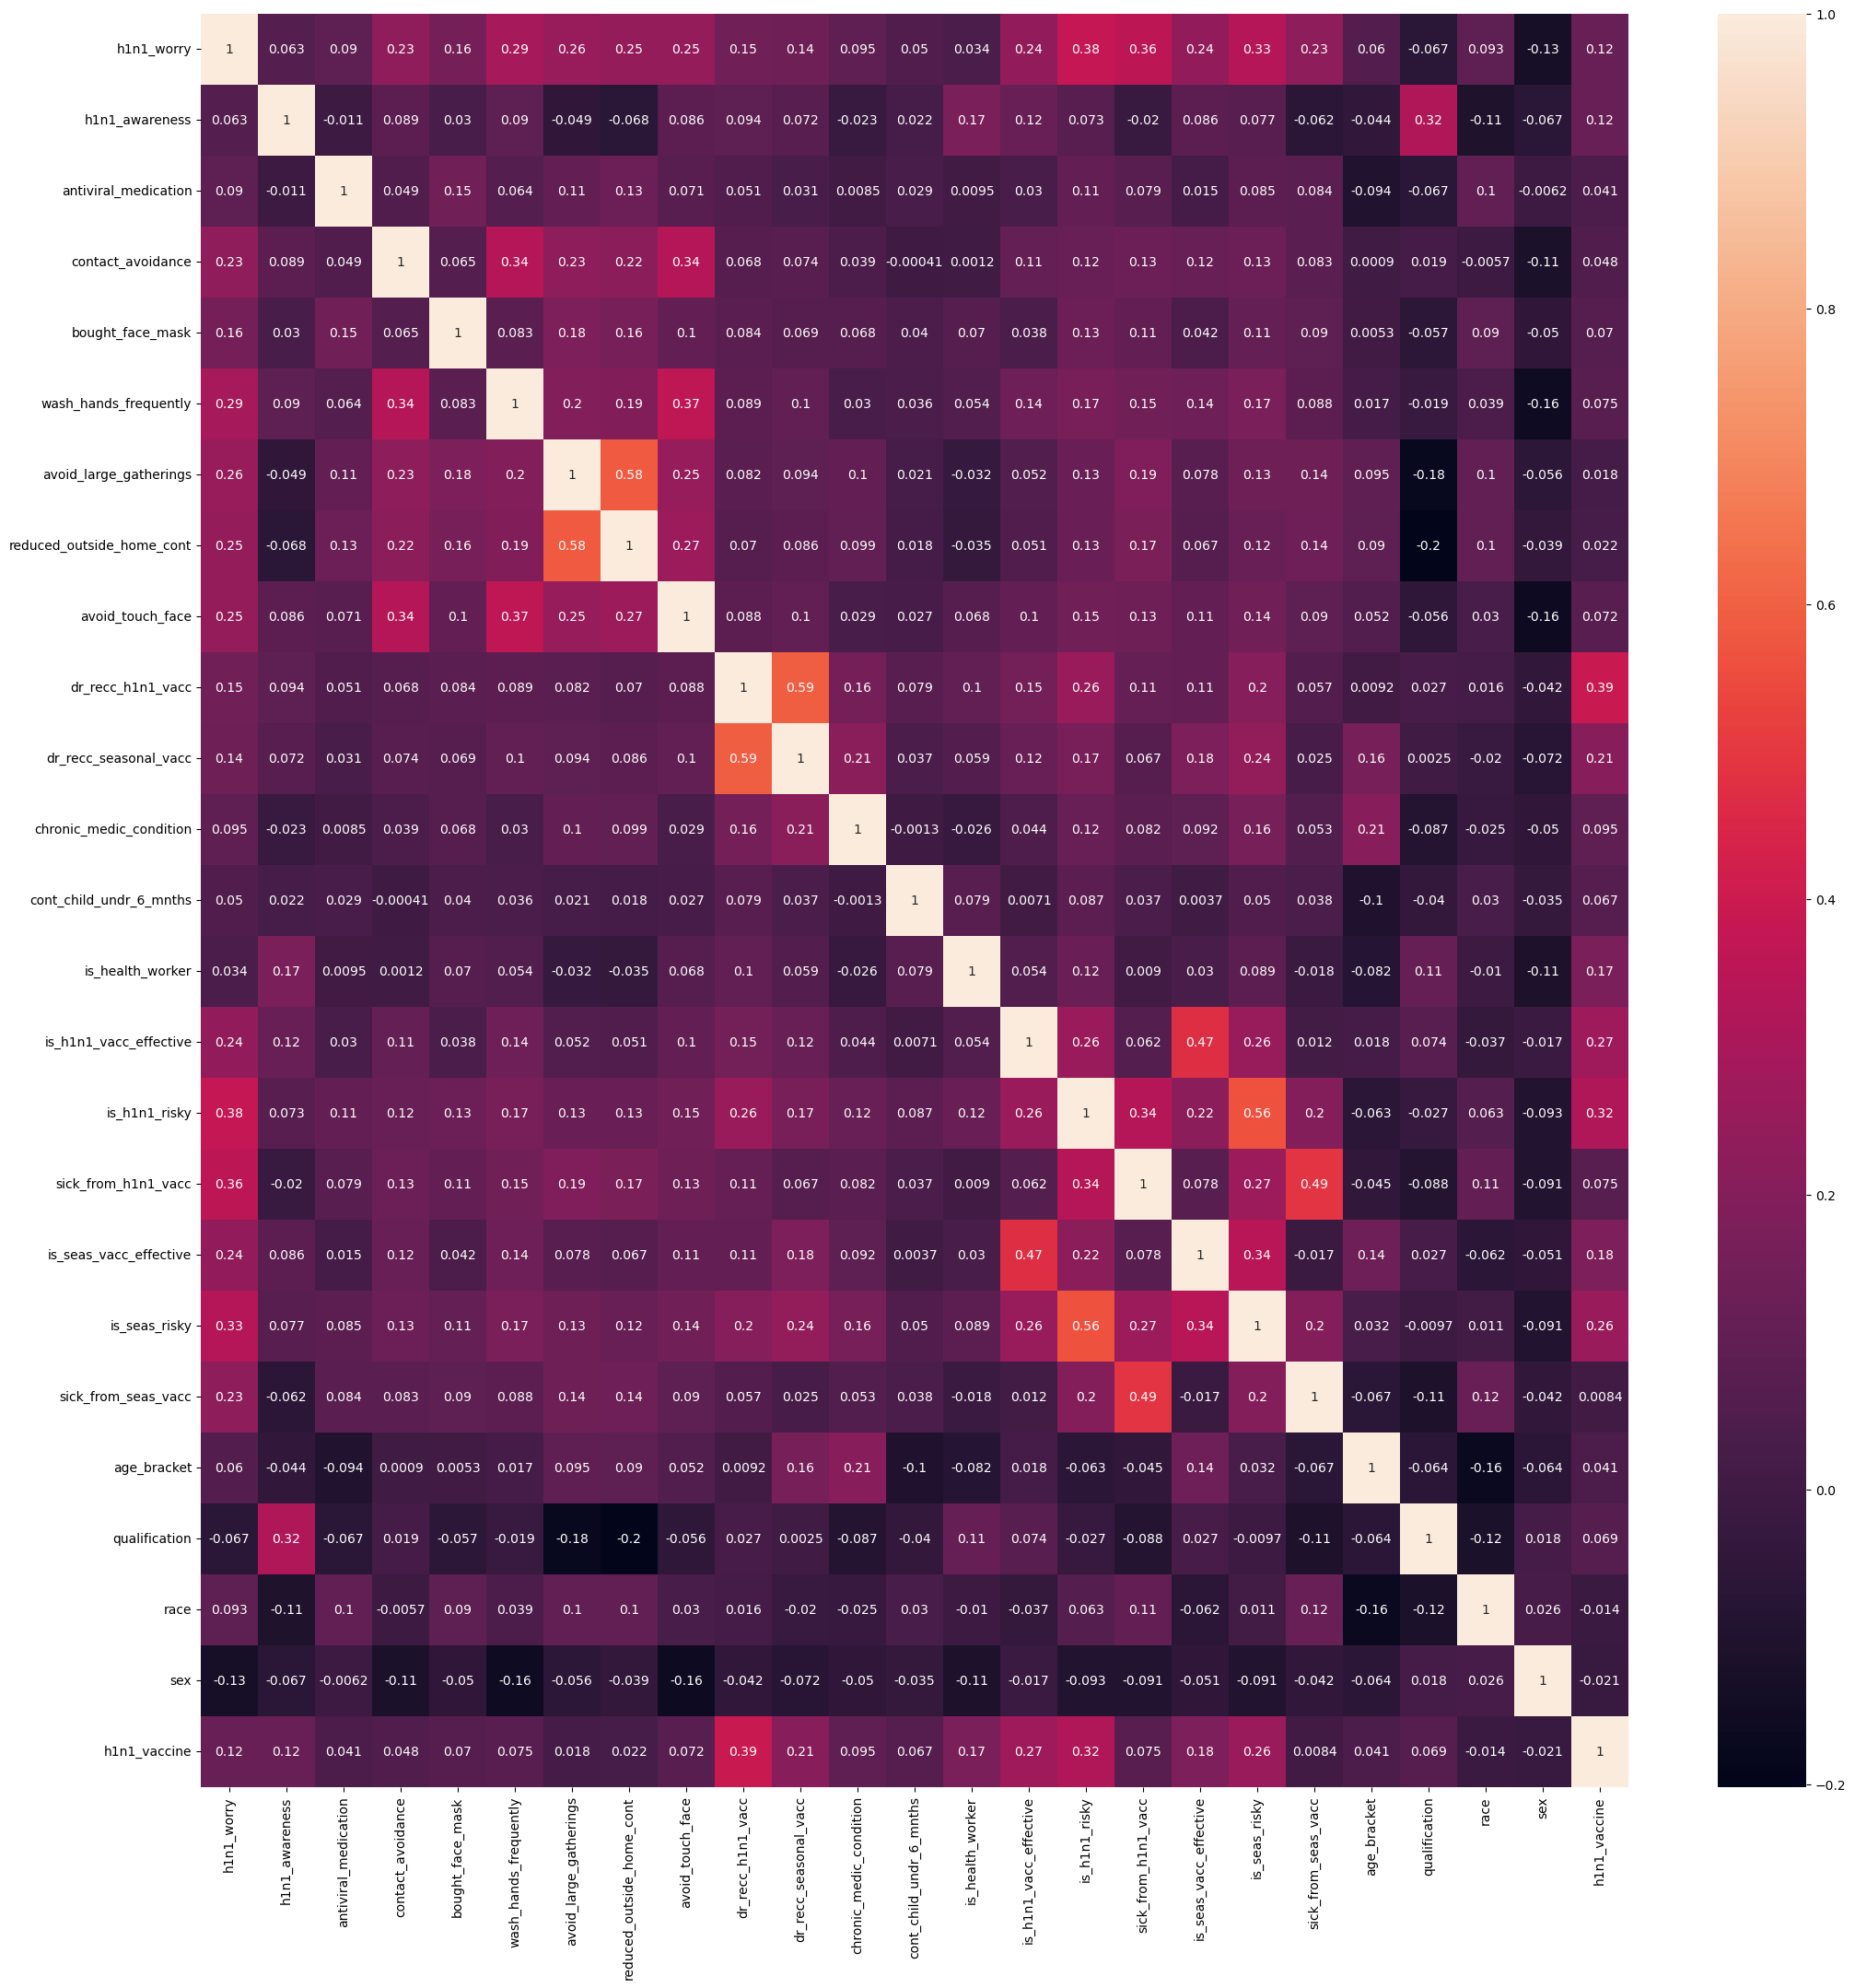

In [26]:
plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True)

<Axes: >

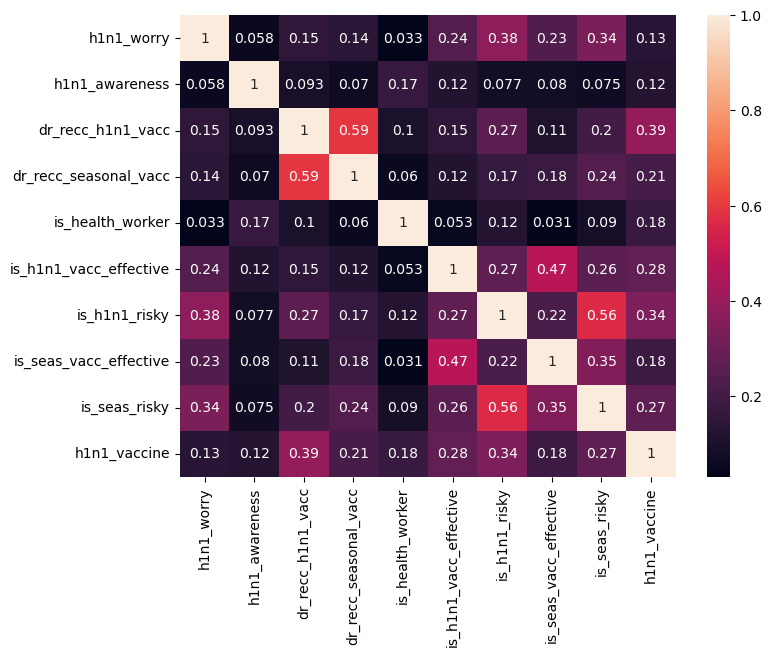

In [47]:
corr1=df_temp.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr1,annot=True)

Text(0.5, 1.0, 'h1n1 worry Vs Vaccination')

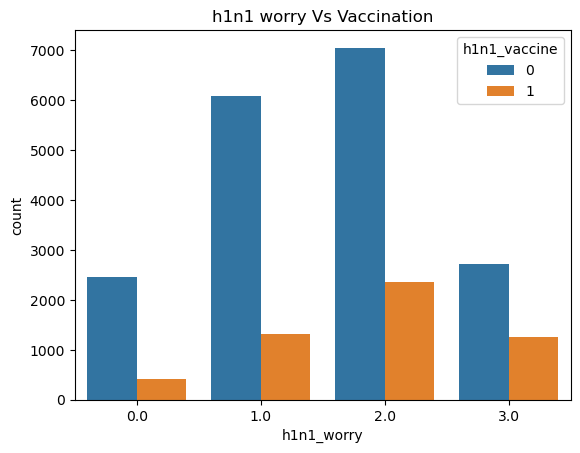

In [28]:
sns.countplot(x="h1n1_worry",hue='h1n1_vaccine',data = df_temp)
plt.title("h1n1 worry Vs Vaccination")

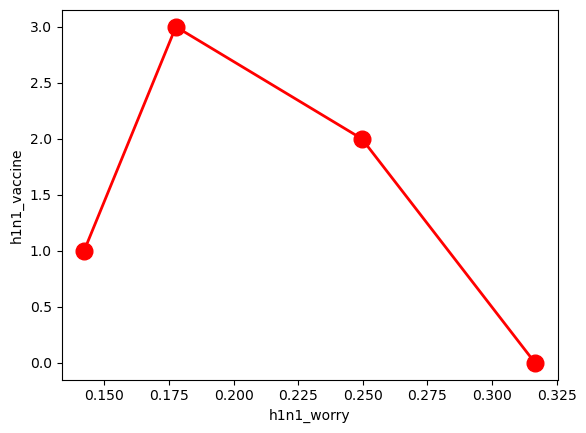

In [29]:

# Grouping by 'h1n1_concern' and calculating the mean of 'h1n1_vaccine'
s1 = df_temp['h1n1_worry'].unique()

# Grouping by 'h1n1_worry' and calculating the mean of 'h1n1_vaccine'
s2 = df_temp.groupby(['h1n1_worry'])['h1n1_vaccine'].mean()

# If 'h1n1_concern' and 'h1n1_worry' have different categories or values,
# align the indices of 's1' and 's2' using reindex
#s1 = s1.reindex(s2.index)

# Plotting the data
plt.plot( s2,s1, color='r', marker='o', linewidth=2, markersize=12)
plt.xlabel('h1n1_worry')
plt.ylabel('h1n1_vaccine')
plt.show()

Text(0.5, 1.0, 'h1n1_awareness Vs Vaccination')

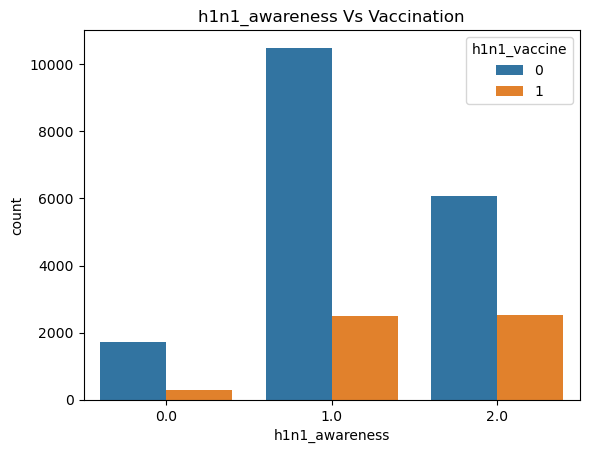

In [30]:
sns.countplot(x="h1n1_awareness",hue='h1n1_vaccine',data = df_temp)
plt.title("h1n1_awareness Vs Vaccination")

<Axes: xlabel='h1n1_awareness', ylabel='count'>

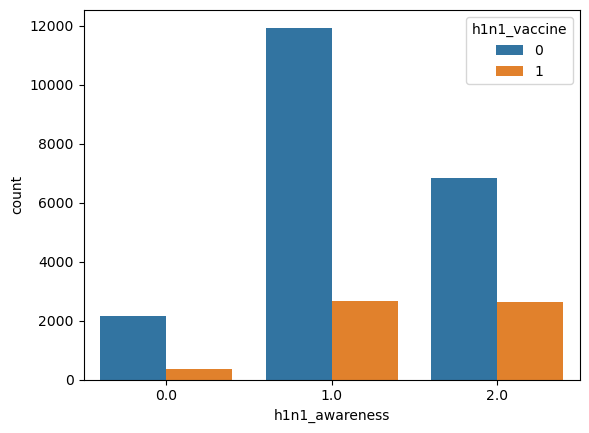

In [31]:
sns.countplot(x="h1n1_awareness",hue='h1n1_vaccine',data = df)

Text(0.5, 1.0, 'health workers Vaccination ')

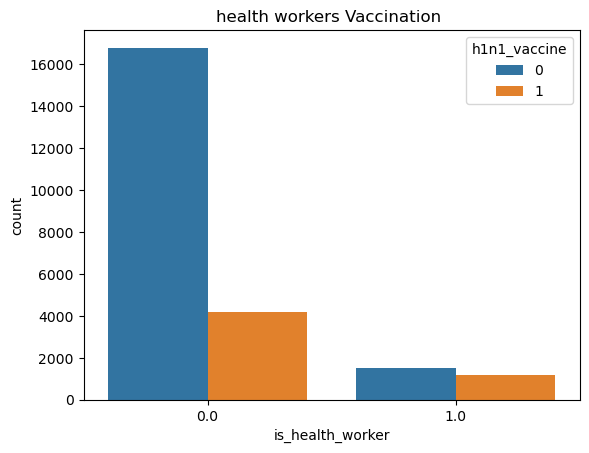

In [32]:
sns.countplot(x="is_health_worker",hue='h1n1_vaccine',data = df_temp)
plt.title("health workers Vaccination ")

## Meachine Learning

In [33]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score

In [34]:
x=df_temp[['h1n1_worry', 'h1n1_awareness','dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
           'is_health_worker','is_h1n1_vacc_effective', 'is_h1n1_risky','is_seas_vacc_effective', 'is_seas_risky']]
y=df_temp['h1n1_vaccine']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
reg=LogisticRegression().fit(x, y)

In [37]:
reg.fit(x_train, y_train)

LogisticRegression()

In [38]:
#Y - Prediction
y_pred = reg.predict(x_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100} %")

Accuracy: 82.1526749841404 %
